In [1]:
!pip install scikit-fuzzy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=985c4c0063e8f2fa81123ac4c9a36e209f45ac3d92d6e2b93730e3fd2634a0cb
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import skfuzzy as skfuzzy

base = pd.read_csv('UCI_Credit_Card.csv')
base.shape

(30000, 25)

In [3]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [5]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [6]:
X = base.iloc[:,[1,25]].values

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
X.shape

(30000, 2)

In [9]:
X.T.shape

(2, 30000)

In [10]:
r = skfuzzy.cmeans(data = X.T, c = 3, m = 2, error=0.005, maxiter=1000, init=None)

In [11]:
r

(array([[-0.73889147, -0.30174742],
        [ 0.74964951,  2.01623668],
        [ 0.97536265, -0.42056003]]),
 array([[0.91181835, 0.84865033, 0.97914484, ..., 0.95010703, 0.95612749,
         0.9729198 ],
        [0.02592808, 0.027327  , 0.0049907 , ..., 0.01492022, 0.01406426,
         0.00906647],
        [0.06225357, 0.12402267, 0.01586447, ..., 0.03497276, 0.02980825,
         0.01801374]]),
 array([[0.39475771, 0.43047101, 0.32232685, ..., 0.24485579, 0.44420927,
         0.41197311],
        [0.41466853, 0.41252146, 0.38704141, ..., 0.22865692, 0.47577148,
         0.42883098],
        [0.19057376, 0.15700753, 0.29063174, ..., 0.52648729, 0.08001925,
         0.15919592]]),
 array([[0.55636816, 0.52128754, 0.20019017, ..., 0.39094798, 0.30021895,
         0.25955786],
        [3.29937165, 2.90499748, 2.80404897, ..., 3.11973449, 2.47535535,
         2.68877028],
        [2.12928744, 1.36361321, 1.57272757, ..., 2.0377003 , 1.70030859,
         1.90752743]]),
 array([25593.133246

In [12]:
previsoes_porcentagem = r[1]

In [13]:
previsoes_porcentagem.shape

(3, 30000)

In [14]:
previsoes_porcentagem

array([[0.91181835, 0.84865033, 0.97914484, ..., 0.95010703, 0.95612749,
        0.9729198 ],
       [0.02592808, 0.027327  , 0.0049907 , ..., 0.01492022, 0.01406426,
        0.00906647],
       [0.06225357, 0.12402267, 0.01586447, ..., 0.03497276, 0.02980825,
        0.01801374]])

In [15]:
previsoes_porcentagem[0][0]

0.9118183464483242

In [16]:
previsoes_porcentagem[1][0]

0.025928081625008065

In [17]:
previsoes_porcentagem[2][0]

0.062253571926667826

In [18]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

1.0

In [19]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [20]:
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
previsoes[5000]

0

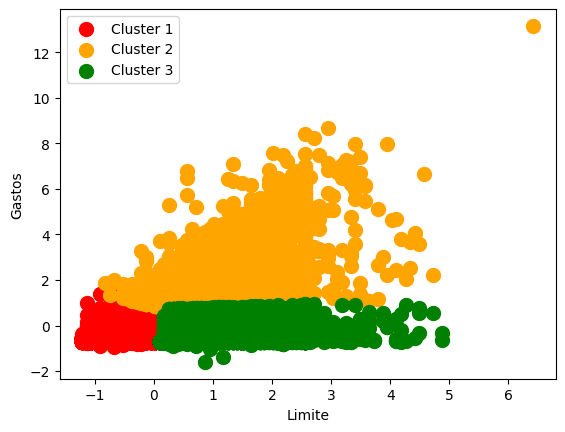

In [22]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();